<a href="https://colab.research.google.com/github/ParsProgrammer/Persian-Handwritten-Digit-Recognition/blob/main/DigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Persian Handwritten Digit Recognition**

There are various methods for the recognition of handwritten digits such as pattern recognition, deep learning, or machine learning. In this project, we used the Sequence Matching algorithm to recognize the digits. The rationale is that the same handwritten digits have similar signals so that by the conversion of images into a single-dimensional sequence of numbers (signals), the algorithm was able to compare signals with some pattern signals and predict the label of images.

In [ ]:
!git clone https://github.com/amir-saniyan/HodaDatasetReader.git

Cloning into 'HodaDatasetReader'...
remote: Enumerating objects: 24, done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 24
Unpacking objects: 100% (24/24), done.


In [ ]:
import os
import cv2
os.chdir('/content/HodaDatasetReader')

In [ ]:
!pip install dtaidistance

dataset_PRL.pdf		   Figure_1.png		 main.py
DigitDB			   Figure_2.png		 README.md
Farsi_Digits_Sample_1.gif  HodaDatasetReader.py
Farsi_Digits_Sample_2.gif  LICENSE
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 797 kB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for dtaidistance: filename=dtaidistance-2.3.6-cp37-cp37m-linux_x86_64.whl size=1599494 sha256=7b81b297c740f49e0430694651021bb013fa6b791676c233ac347e447313b017
  Stored in directory: /root/.cache/pip/wheels/a4/04/e5/ff7fd821276e7ec68893652d36b6a13f230ecdcafdc3283b3f
Successfully built dtaidistance


In [ ]:
from HodaDatasetReader import read_hoda_dataset
from HodaDatasetReader import read_hoda_cdb
from matplotlib import pyplot as plt
import numpy as np
from dtaidistance import dtw

Reading the dataset

In [ ]:
print('Reading train dataset (Train 60000.cdb)...')
X_train, Y_train = read_hoda_dataset(dataset_path='./DigitDB/Train 60000.cdb',
                                images_height=32,
                                images_width=32,
                                one_hot=False,
                                reshape=True)

print('Reading test dataset (Test 20000.cdb)...')
X_test, Y_test = read_hoda_dataset(dataset_path='./DigitDB/Test 20000.cdb',
                                images_height=32,
                                images_width=32,
                                one_hot=False,
                                reshape=True)




Reading train dataset (Train 60000.cdb)...
Reading test dataset (Test 20000.cdb)...


with the help of erosion, this function obtains the boundary of digits

In [ ]:
# the function for thinning
def Get_boundary_Bythinning(img):
    kernel = np.ones((3,3),np.uint8)
    erosion = cv2.erode(img,kernel,iterations = 1)
    ee=np.reshape(erosion, (32, 32))
    a=np.reshape( img, (32, 32)) - ee
    return a

It is needed to draw a list of digit patterns

In [ ]:
pattern = np.empty((0, X_train[0].shape[0]), np.uint8)
pattern_size = 1000
for i in range(10):
  id_list = np.where(Y_train == i)[0]
  s= np.random.choice(id_list,pattern_size)
  pattern = np.concatenate((pattern, X_train[s].astype(np.uint8)) ,axis=0)

test=np.empty((0, X_test[0].shape[0]), np.uint8)
test_size = 20
for i in range(10):
  id_list = np.where(Y_test == i)[0]
  s= np.random.choice(id_list, test_size)
  test = np.concatenate((test, X_test[s].astype(np.uint8)), axis=0)


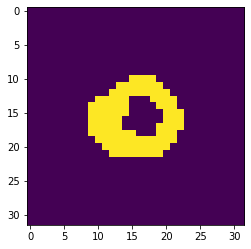

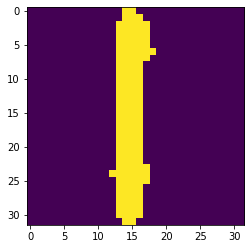

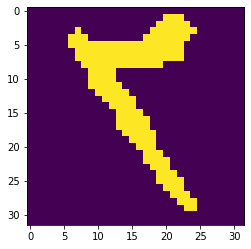

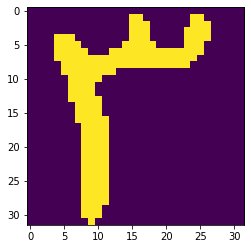

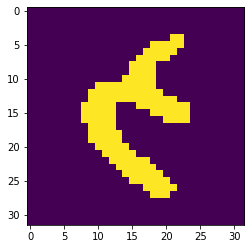

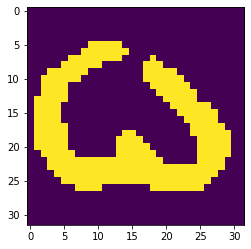

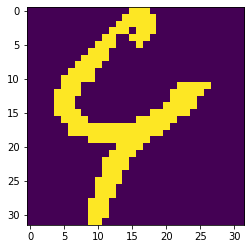

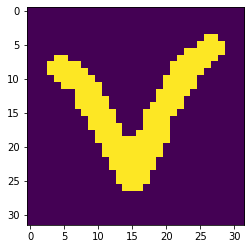

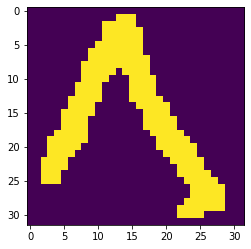

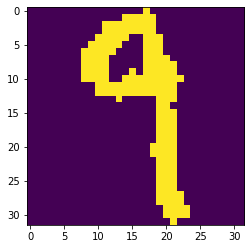

In [ ]:
for i in range(10):
    plt.imshow(np.reshape(pattern[i*pattern_size, :] ,(32,32)), interpolation='nearest')
    plt.show()

thinning the patterns

In [ ]:
thinned_pattern=pattern.copy()
for i in range(10*pattern_size):
    dd=  Get_boundary_Bythinning(np.reshape( thinned_pattern[i],(32,32)))
    thinned_pattern[i]= np.reshape( dd,(1024))
    # plt.imshow(dd, interpolation='nearest')
    # plt.show()
    # thinned_pattern[i][j] = thinned_pattern[i][0][j]. astype(int)



thinning the test

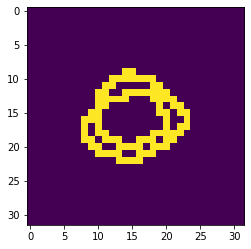

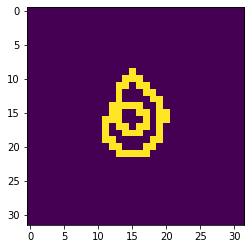

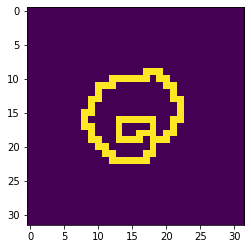

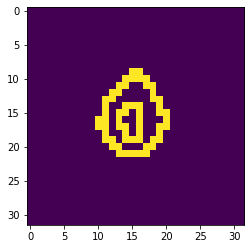

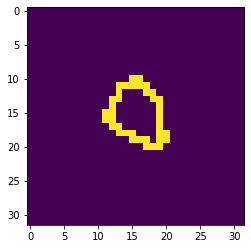

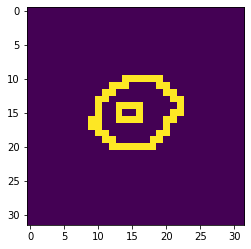

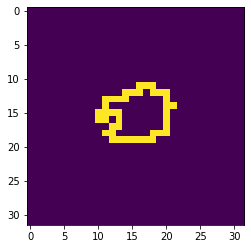

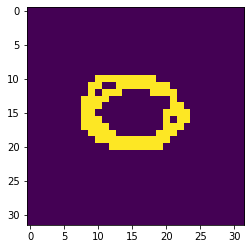

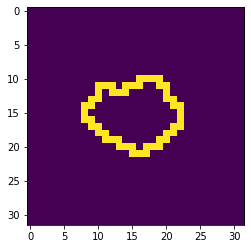

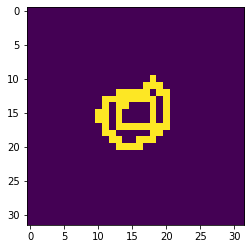

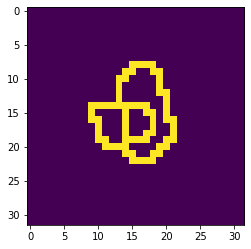

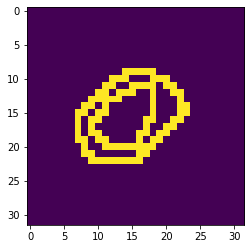

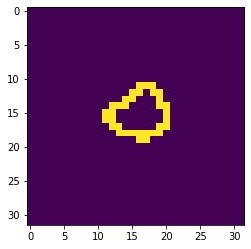

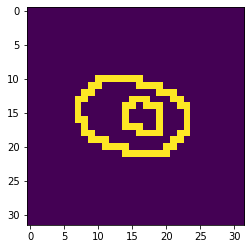

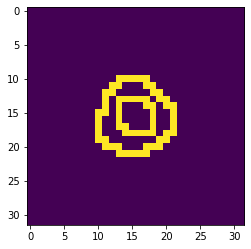

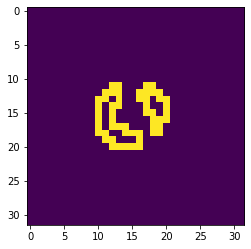

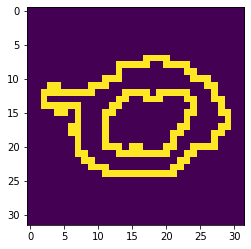

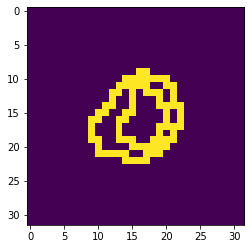

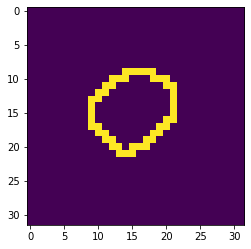

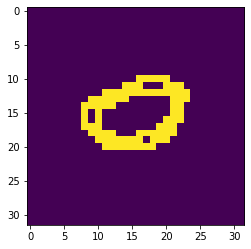

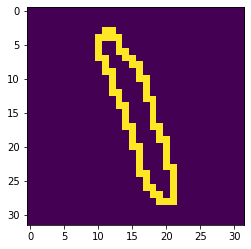

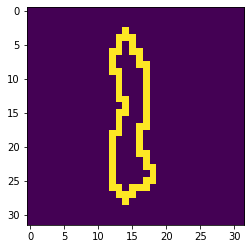

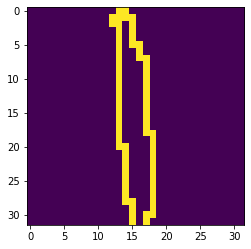

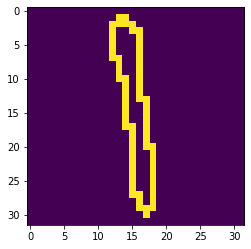

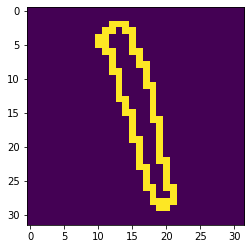

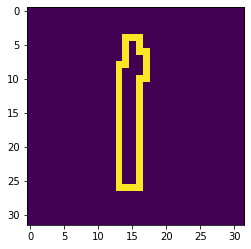

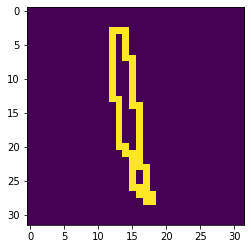

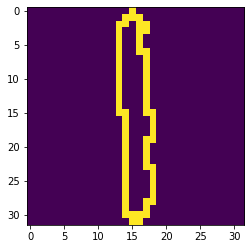

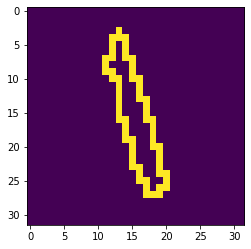

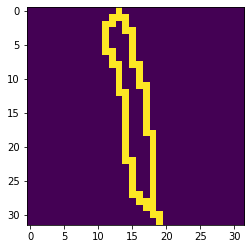

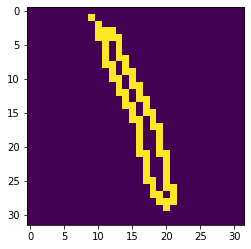

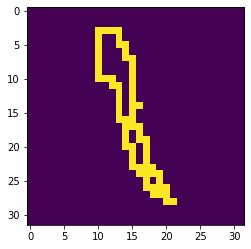

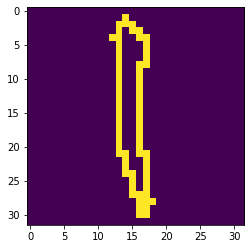

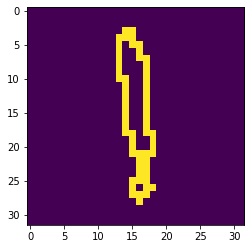

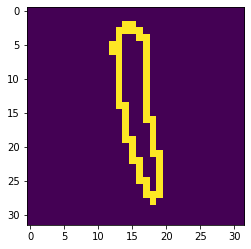

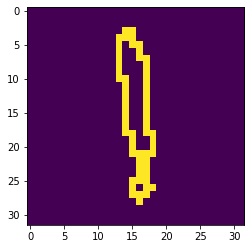

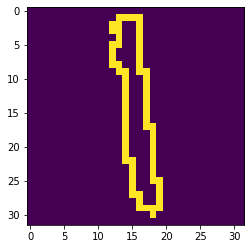

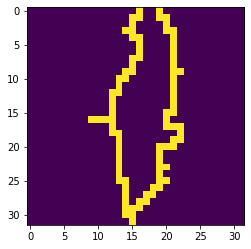

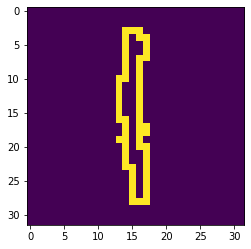

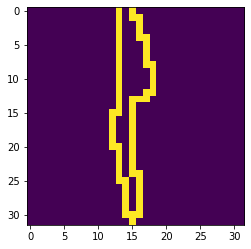

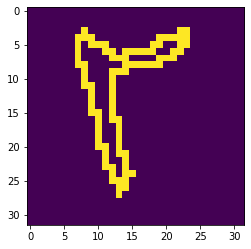

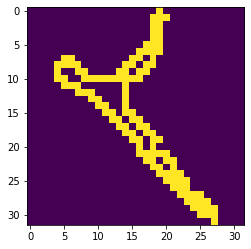

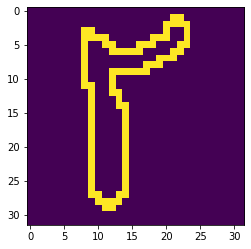

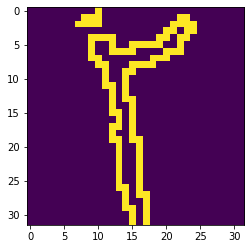

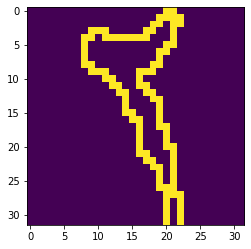

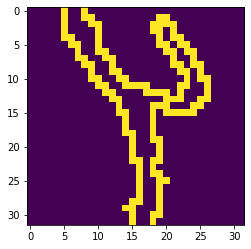

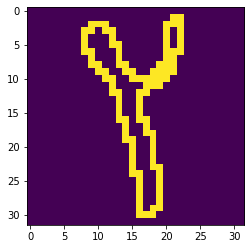

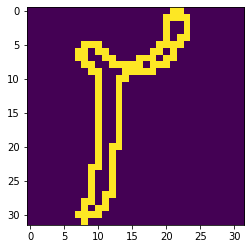

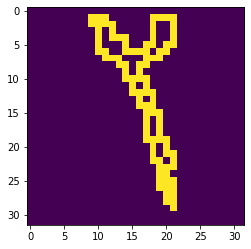

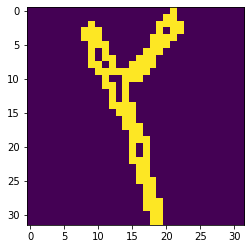

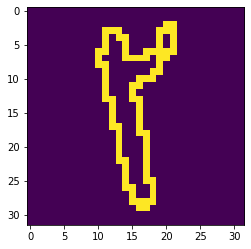

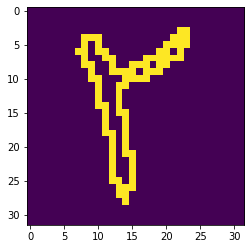

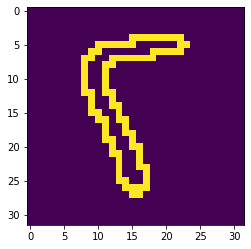

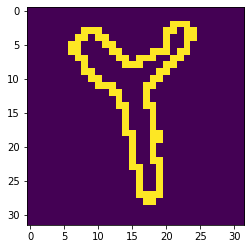

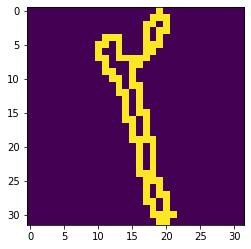

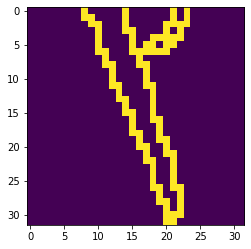

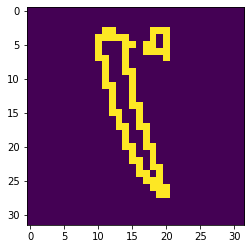

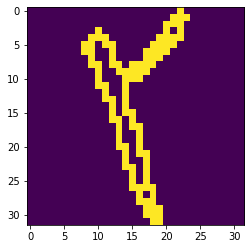

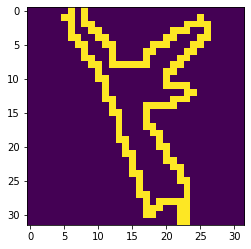

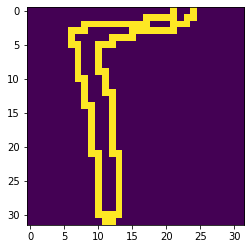

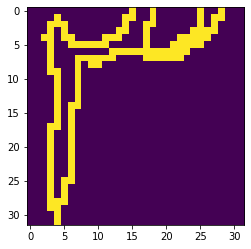

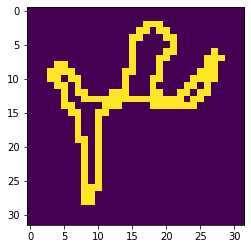

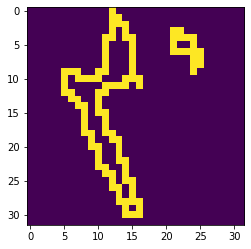

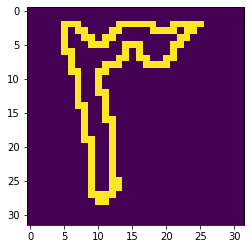

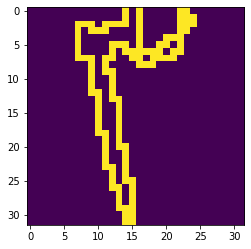

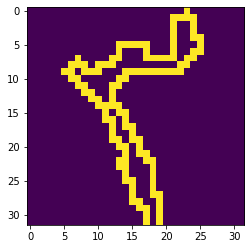

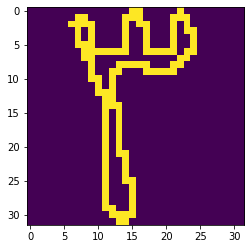

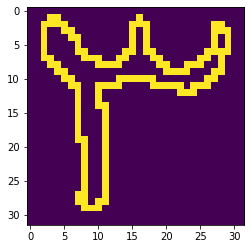

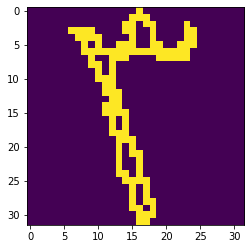

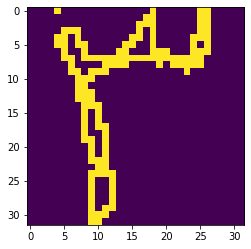

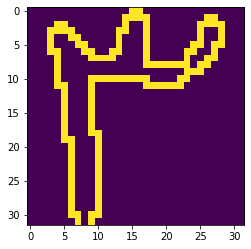

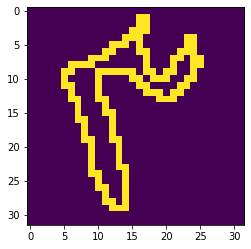

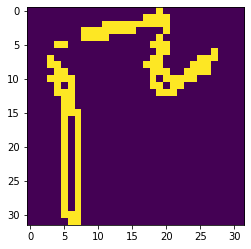

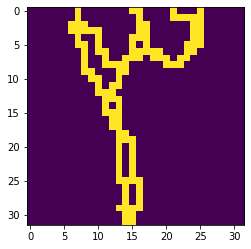

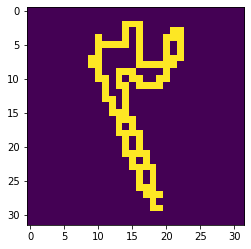

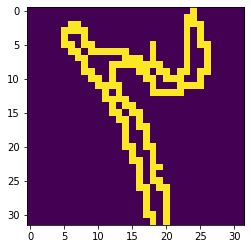

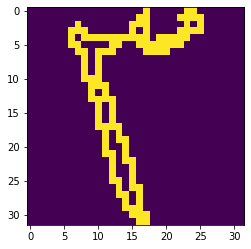

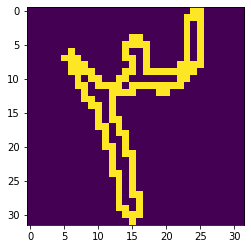

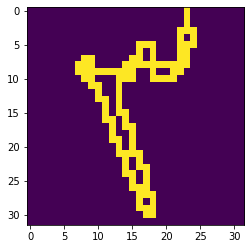

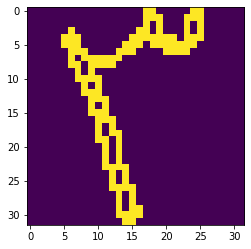

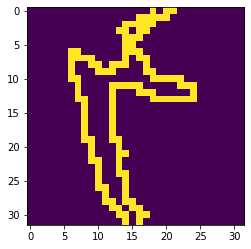

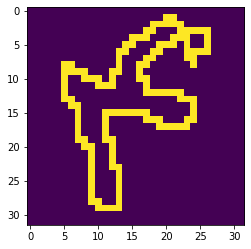

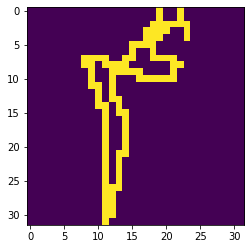

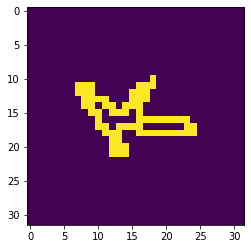

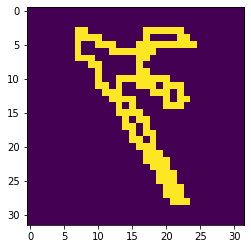

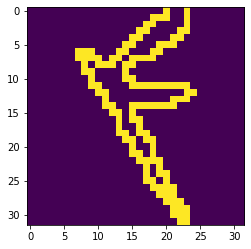

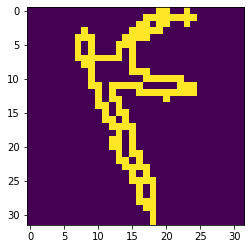

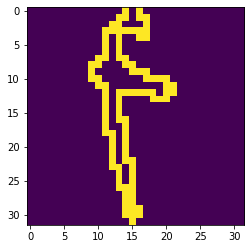

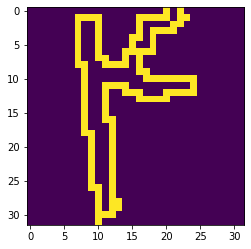

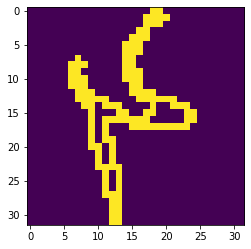

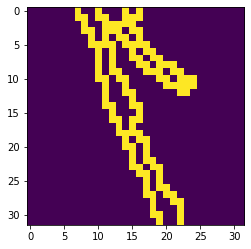

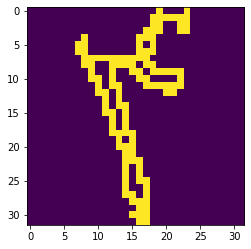

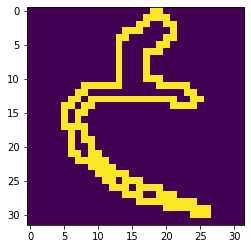

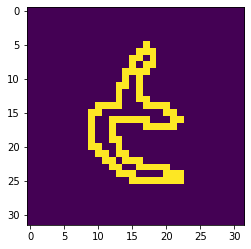

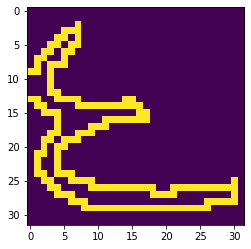

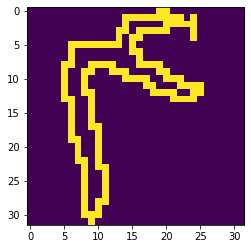

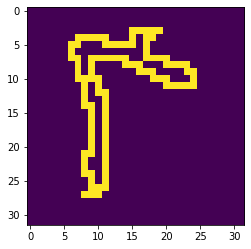

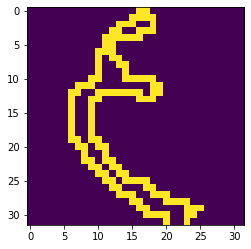

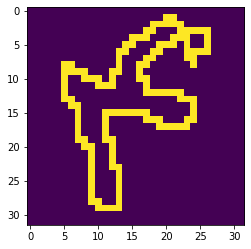

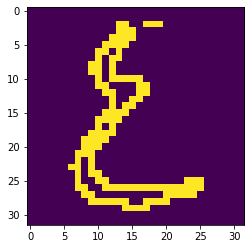

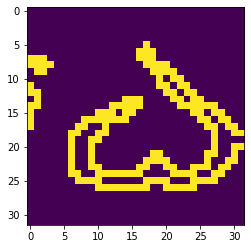

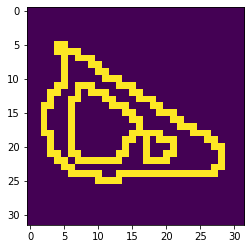

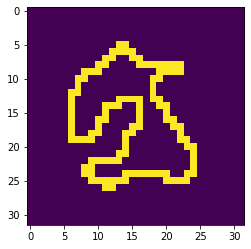

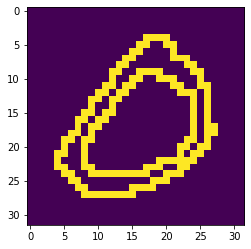

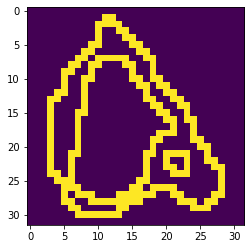

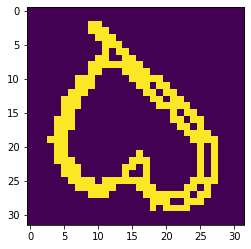

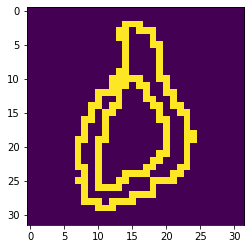

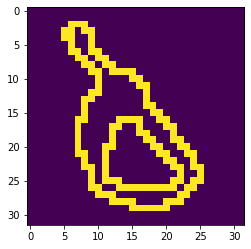

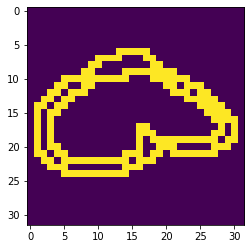

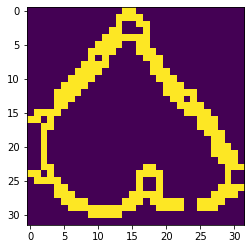

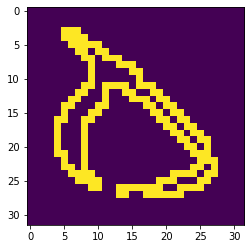

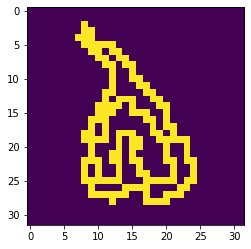

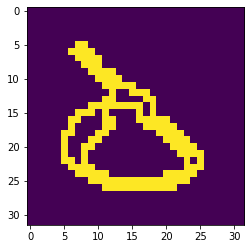

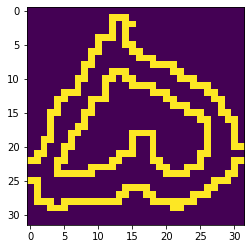

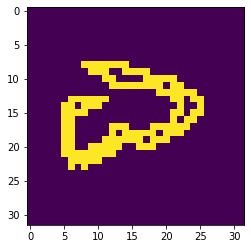

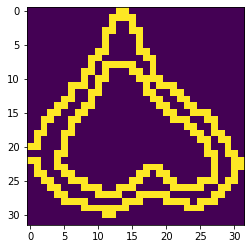

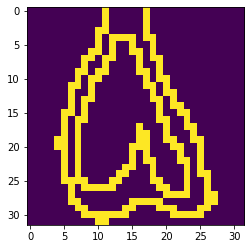

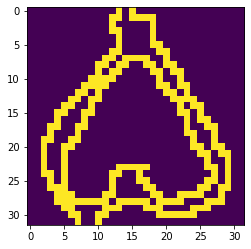

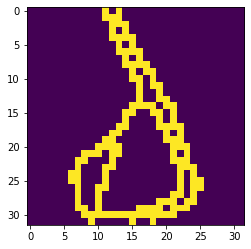

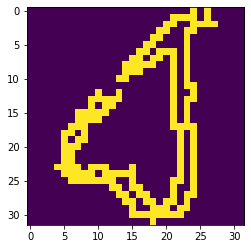

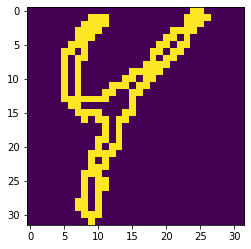

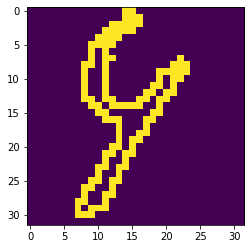

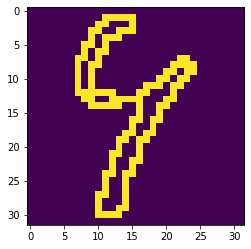

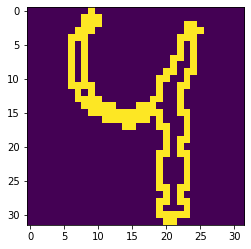

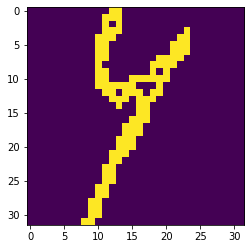

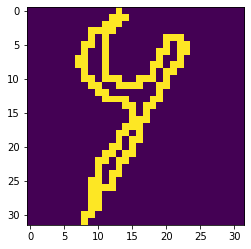

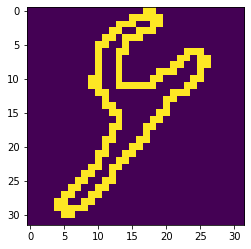

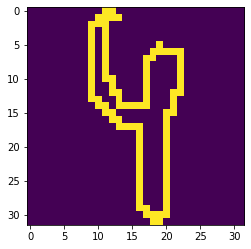

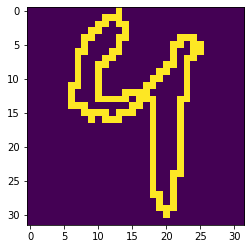

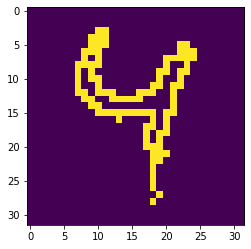

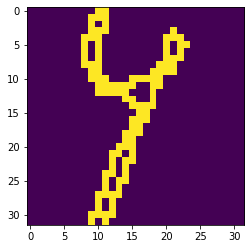

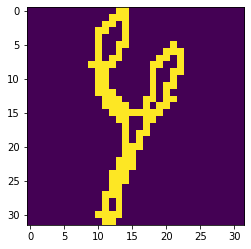

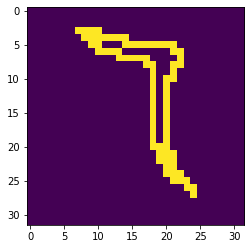

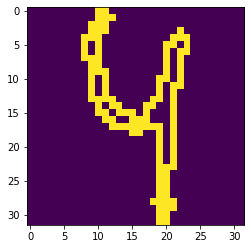

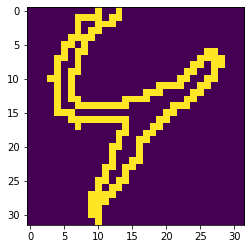

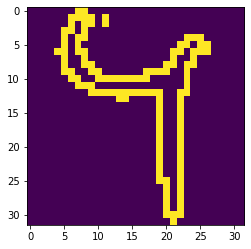

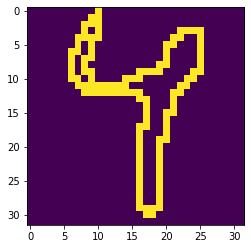

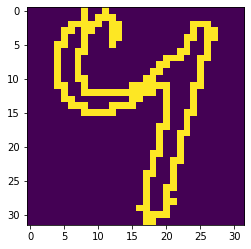

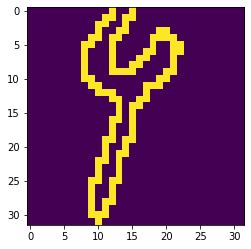

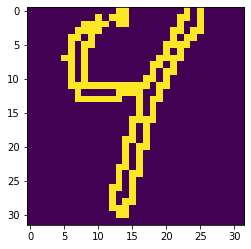

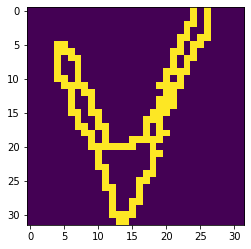

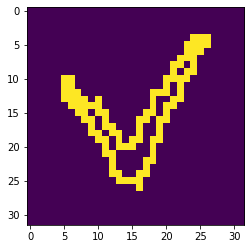

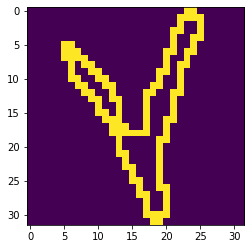

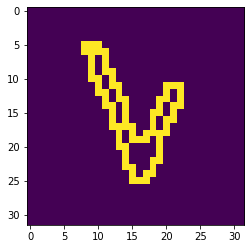

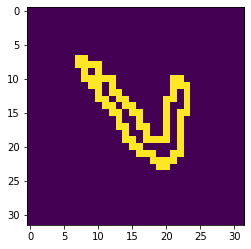

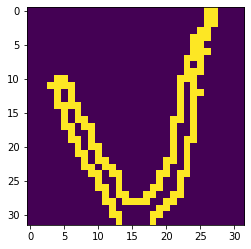

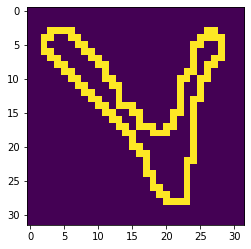

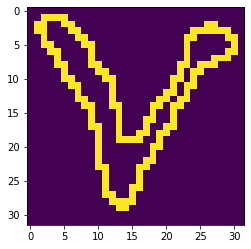

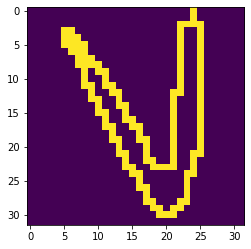

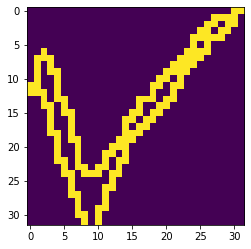

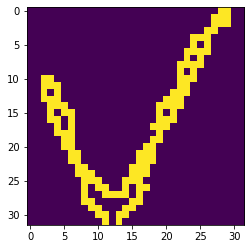

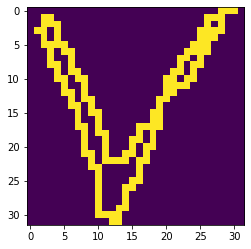

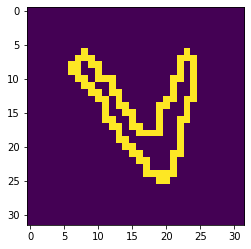

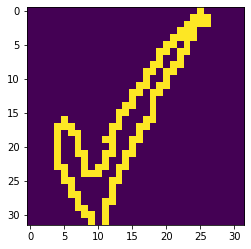

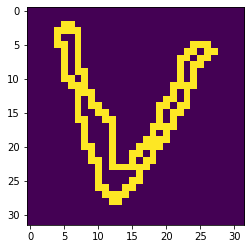

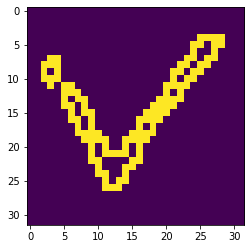

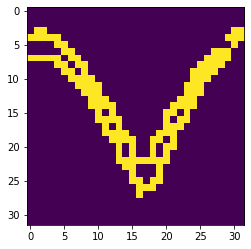

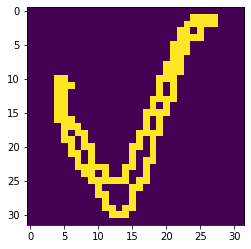

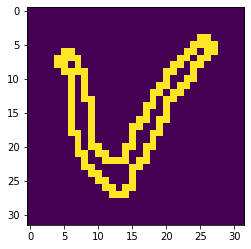

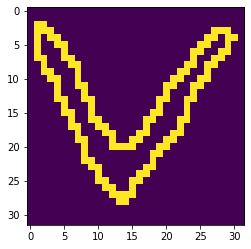

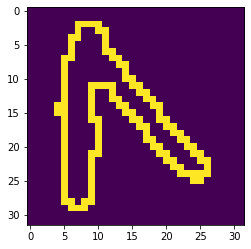

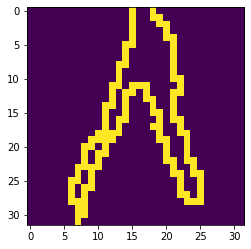

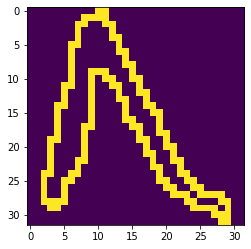

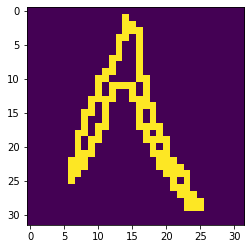

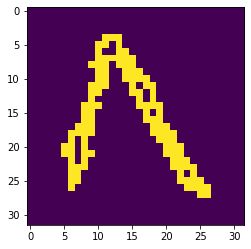

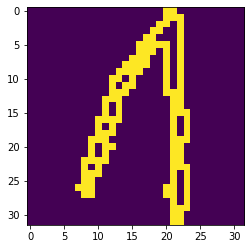

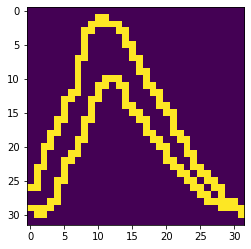

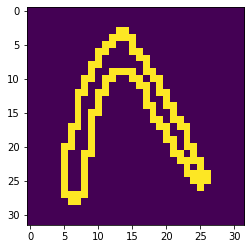

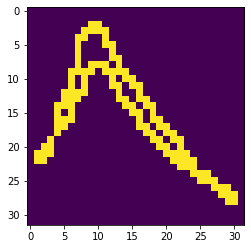

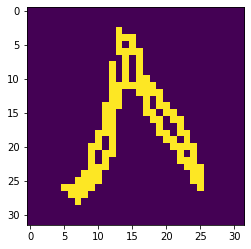

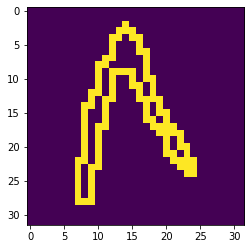

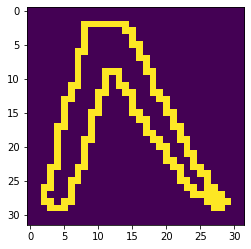

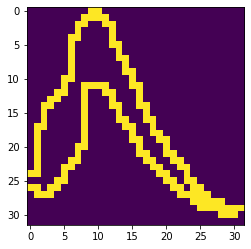

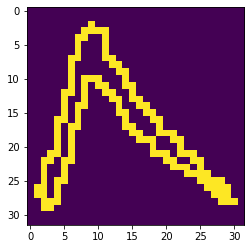

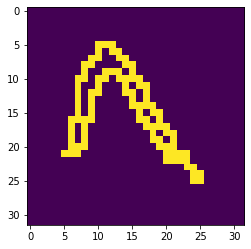

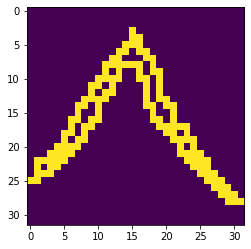

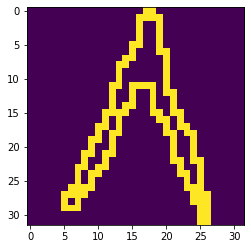

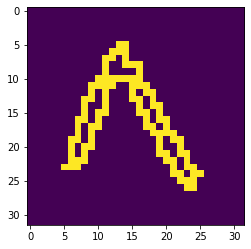

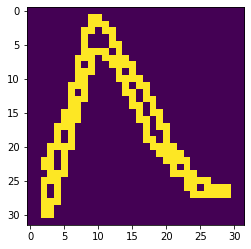

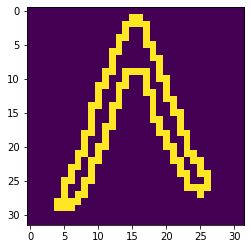

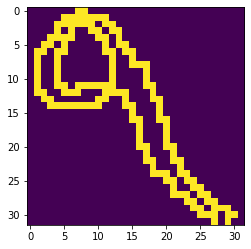

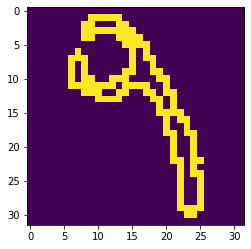

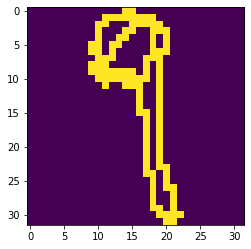

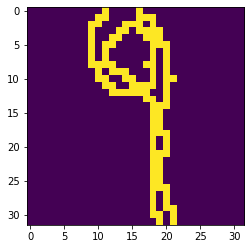

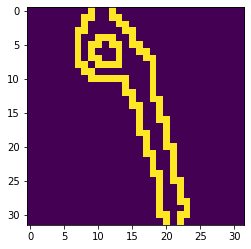

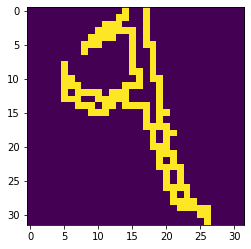

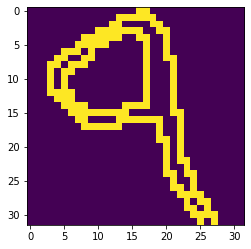

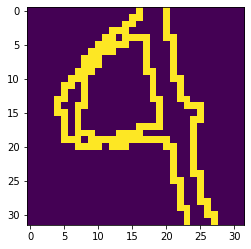

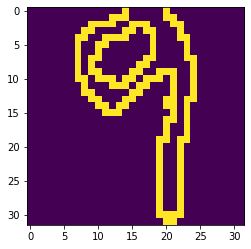

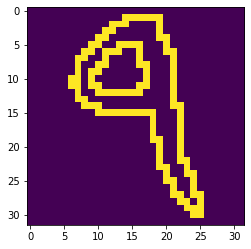

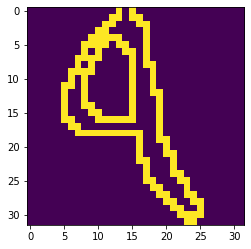

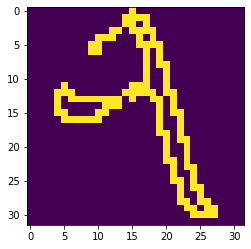

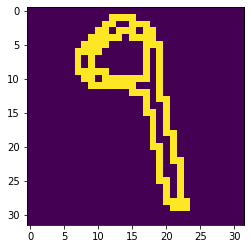

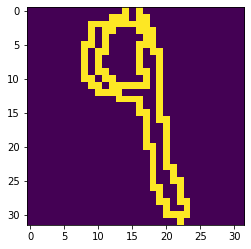

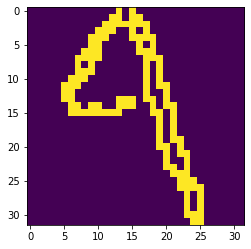

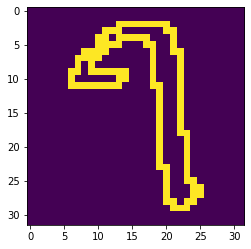

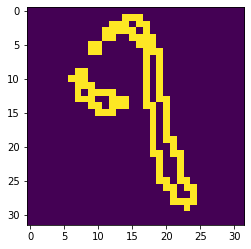

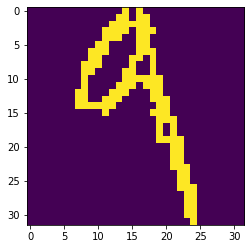

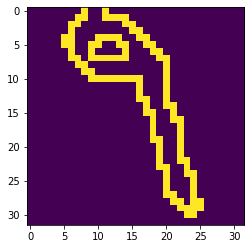

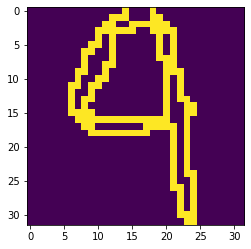

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 9., 9., 9., 9., 9., 9., 9.,
       9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.])

In [ ]:
thinned_test=test
thinned_test_label = np.zeros(test.shape[0])
for i in range(test.shape[0]):
    f=np.reshape(test[i] ,(32,32))
    dd=  Get_boundary_Bythinning(f)
    thinned_test[i]= np.reshape( dd,(1024))
    thinned_test_label[i] = i //test_size
    plt.imshow(dd, interpolation='nearest')
    plt.show()
thinned_test_label


calculating the distance of datapoints with patterns and predict the label

In [ ]:
distance = np.zeros((test.shape[0], 10))
for m in range(test.shape[0]):
  for n in range(thinned_pattern.shape[0]//pattern_size):

    for i in range(pattern_size):

      distance[m,n] += dtw.distance_fast(thinned_test[m].astype(np.double), thinned_pattern[n*pattern_size +i].astype(np.double))

  print(f'\n input label: {thinned_test_label[m]}')
  print(distance[m])
  p = np.argmin(distance[m])
  print(f'output label:{p}')
  print('right' if p==thinned_test_label[m] else 'wrong','prediction')




 input label: 0.0
[3167.34482929 4199.93929631 5238.04052297 6104.33442219 5269.32843547
 7389.88629781 5531.85747515 6429.0004558  6747.45774478 6040.94170773]
output label:0
right prediction

 input label: 0.0
[2776.00206085 4863.97483693 5853.92535156 6772.53825291 6012.95865135
 8163.64535957 6291.10053344 7152.29991854 7440.13229193 6639.42962706]
output label:0
right prediction

 input label: 0.0
[2905.82610212 4425.60255875 5439.92553968 6313.73333594 5507.27134199
 7646.26719013 5778.31781951 6658.31813903 6966.66549599 6232.00399823]
output label:0
right prediction

 input label: 0.0
[2961.11465633 4315.58501461 5338.1151545  6207.02661157 5385.48603424
 7515.99523194 5653.53393618 6543.30325618 6855.66247124 6135.75811992]
output label:0
right prediction

 input label: 0.0
[3232.96720528 5768.36587653 6951.95807113 7920.65622149 7304.02814181
 9355.95376901 7531.72494702 8316.4411554  8562.73561928 7742.2126491 ]
output label:0
right prediction

 input label: 0.0
[2913.35186

In [ ]:
predict = np.argmin(distance, axis=1)
for i in range(10):
  precent = sum(predict[i*test_size:(i+1)*test_size]==thinned_test_label[i*test_size:(i+1)*test_size])/test_size
  print(f'{i} : {precent}')


0 : 0.9
1 : 0.85
2 : 0.35
3 : 0.0
4 : 0.0
5 : 0.3
6 : 0.0
7 : 0.0
8 : 0.35
9 : 0.4
